In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Load the dataset
data = pd.read_csv(r"C:\Users\user\Downloads\road_accidents.csv")

data.head()

,Weather,Road Condition,Traffic Volume,Driver Age,Vehicle Age,Speed,Time of Day,Accident Severity
0,Foggy,Wet,39,59,17,103,Night,3
1,Snowy,Dry,55,57,10,98,Night,3
2,Rainy,Icy,96,59,18,98,Night,1
3,Snowy,Dry,89,24,4,86,Day,3
4,Rainy,Dry,89,30,8,117,Night,3


In [8]:
# Define the dependent variable and independent variables
X = data[['Weather', 'Road Condition', 'Traffic Volume', 'Driver Age', 'Vehicle Age', 'Speed', 'Time of Day']]
y = data['Accident Severity']



In [15]:
# Step 2: Preprocess categorical features
categorical_features = ['Weather', 'Road Condition', 'Time of Day']
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), categorical_features)], remainder='passthrough')

# Step 3: Create the pipeline with preprocessor and Linear Regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Create the linear regression model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Weather', 'Road Condition',
                                                   'Time of Day'])])),
                ('model', LinearRegression())])

In [18]:
# Save the model for future use
joblib.dump(model, 'accident_severity_model.pkl')


['accident_severity_model.pkl']

In [24]:
# Example input data with matching column names and structure
hypothetical_data = pd.DataFrame({
    'Weather': ['Sunny'],            # Example weather condition
    'Road Condition': ['Dry'],       # Example road condition
    'Traffic Volume': [500],         # Example traffic volume
    'Driver Age': [35],              # Example driver age
    'Vehicle Age': [5],              # Example vehicle age
    'Speed': [80],                   # Example speed in km/h
    'Time of Day': ['Night']       # Example time of day
})

# Predict accident severity using the pipeline
predicted_severity = pipeline.predict(hypothetical_data)
print(f'Predicted Accident Severity: {predicted_severity[0]}')


Predicted Accident Severity: 0.31940554998892257


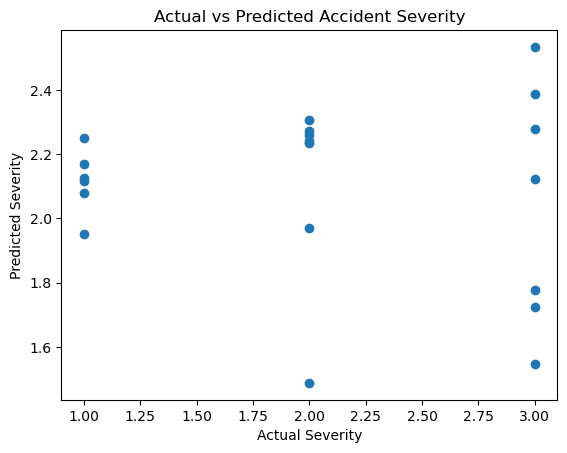

In [26]:
import matplotlib.pyplot as plt

# Predict on the test set to get y_pred
y_pred = pipeline.predict(X_test)

# Visualization of Actual vs Predicted Accident Severity
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Severity')
plt.ylabel('Predicted Severity')
plt.title('Actual vs Predicted Accident Severity')
plt.show()
